In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns

from IPython.display import Image
from graphviz import Digraph
from sklearn import tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [10]:
def preproceed(dataframe):
    # 欠損値の処理
    dataframe.replace({'Nan':pd.np.nan,'nan':pd.np.nan},inplace=True)
    dataframe.fillna(dataframe.mean(numeric_only=True),inplace=True)
    dataframe.fillna(dataframe.mode().loc[0],inplace=True)

    #いらない列(Cabin,Name,PassengerId,Ticket)の削除
    dataframe.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

    #質的変数を変換
    dataframe['Sex'] = dataframe['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    dataframe['Embarked'] = dataframe['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).astype('int')

In [11]:
#csvデータの呼び出し場所
loadpath = "../input/"
#csvデータの保存場所
savepath = "../output/"

* csv呼び出し

In [12]:
df = pd.read_csv(loadpath + "train.csv")
df_test = pd.read_csv(loadpath + "test.csv")
test_id = df_test.PassengerId
preproceed(df)
preproceed(df_test)

* 前処理

In [13]:
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
#データを分割
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

* 決定木で学習

In [14]:
# clf = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(n_estimators=1000,random_state=0)
clf = rf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [15]:
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
print("auc = ",auc(fpr, tpr))
print("accuracy_score = ", accuracy_score(pred, test_y))

auc =  0.81062835381686
accuracy_score =  0.8283582089552238


* DecisionTreeの時の可視化用

In [16]:
# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns,max_depth=3)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("graph.pdf")
# Image(graph.create_png())

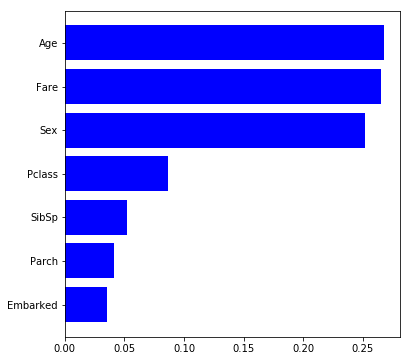

In [17]:
features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [18]:
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
test_X = df_test#.drop('Survived', axis=1)
# test_y = df_test.Survived
cls = rf.fit(df.drop('Survived', axis=1),df.Survived)

In [19]:
test_y = cls.predict(test_X)

In [20]:
submission_result = pd.DataFrame({'PassengerId':test_id,"Survived":test_y})

In [21]:
submission_result.to_csv(savepath + 'submission.csv',index=False)

In [22]:
pd.read_csv(savepath+ 'submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
